In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry.point import Point
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
region = gpd.read_file(r"D:\NUS\project\Singapore_subzone\region_2019\sg_island_region.shp")
subzone = gpd.read_file(r"C:\Users\YOLO\Desktop\early cases\subzone_shapefile\hotspots_analysis\subzone_early_cases.shp")

In [3]:
print('region.crs:{}\nsubzone.crs:{}'.format(region.crs,subzone.crs))

region.crs:GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
subzone.crs:GEOGCS["GCS_unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [4]:
subzone = subzone.to_crs('EPSG:4326')

In [5]:
early_cases_hotspot = subzone.loc[(subzone['PP_VAL']<=0.05)&(subzone['C_ID']==1)].copy()
early_cases_coldspot = subzone.loc[(subzone['PP_VAL']<=0.05)&(subzone['C_ID']==2)].copy()

In [6]:
points = gpd.GeoSeries([Point(102.7,1.25), Point(103.7, 1.25)], crs=4326)
points = points.to_crs('EPSG:3414')
distance_meters = points[0].distance(points[1])
distance_meters

111301.44035524513

In [7]:
points.to_crs

<bound method GeoSeries.to_crs of 0    POINT (-98138.899 25871.390)
1     POINT (13162.538 25844.549)
dtype: geometry>

(103.58176619186605, 104.10832548376095, 1.197213322733669, 1.4838015706251309)

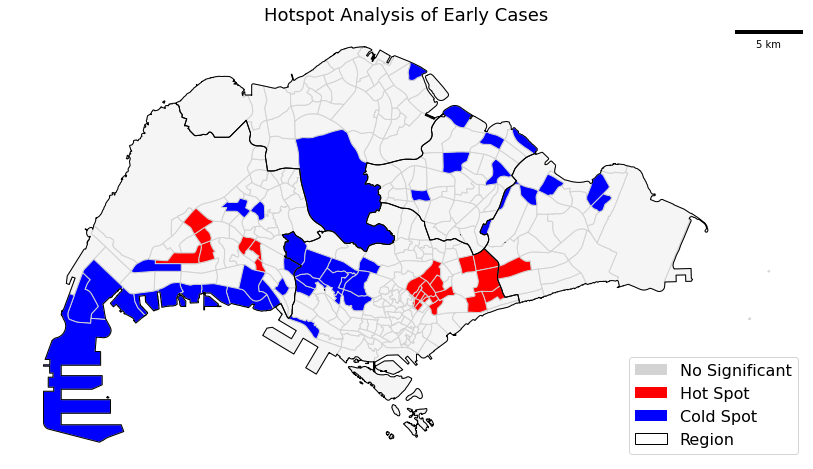

In [8]:
fig,ax = plt.subplots(figsize = (20,8))
subzone.plot(ax = ax, facecolor = "whitesmoke", ec = "lightgrey", label = 'No Significant')
early_cases_hotspot.plot(ax = ax, facecolor = "red", ec = "lightgrey",label = "Hot Spot")
early_cases_coldspot.plot(ax = ax, facecolor = 'blue',ec = 'lightgrey',label = "Cold Spot")
region.plot(ax = ax,facecolor = "none",ec = "black",label = "Region")

ax.set_title('Hotspot Analysis of Early Cases ',fontsize = 18)

no_significance_patch = mpatches.Patch(facecolor='lightgrey', label='The red data')
hotspot_patch = mpatches.Patch(facecolor='red', label='The white data')
coldspot_patch = mpatches.Patch(facecolor='blue', label='The grey data')
region_patch = mpatches.Patch(facecolor='white',edgecolor = 'black', label='The blue data')

lines = [no_significance_patch,hotspot_patch,coldspot_patch,region_patch]
labels = [t.get_label() for t in ax.collections[0:5]]
ax.legend(lines,labels,edgecolor = None,loc = 'lower right',fontsize = 16)
ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))
ax.axis('off')

<AxesSubplot:>

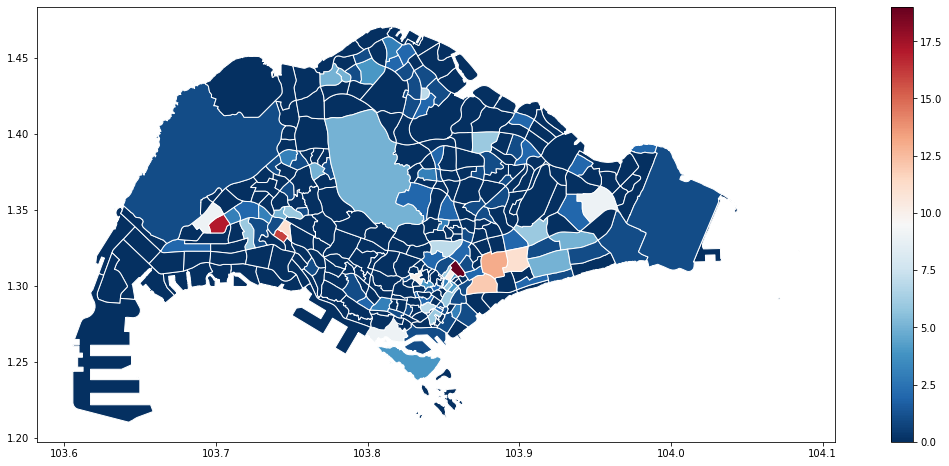

In [27]:
fig,ax = plt.subplots(figsize = (20,8))
subzone.plot(ax = ax, column = 'early_case',edgecolor='white',cmap='RdBu_r',legend=True)

In [35]:
subzone_early_cases = gpd.read_file(r"C:\Users\YOLO\Desktop\early cases\subzone_shapefile\hotspots_analysis\subzone_early_cases.shp")
subzone_early_cases['cases_density'] = subzone_early_cases['early_case']*1000000 /subzone_early_cases['AREA']

In [37]:
subzone_early_cases.to_file(r'C:\Users\YOLO\Desktop\early cases\early_cases_density\subzone_early_cases_density.shp')

D:\anaconda\Anaconda\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\YOLO\AppData\Local\Temp/ipykernel_22744/2316087113.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subzone_early_cases.to_file(r'C:\Users\YOLO\Desktop\early cases\early_cases_density\subzone_early_cases_density.shp')


In [40]:
subzone_early_cases = gpd.read_file(r"C:\Users\YOLO\Desktop\early cases\early_cases_density\early_cases_density_hot_spots.shp")
subzone_early_cases.columns

Index(['POLY_ID', 'Name', 'SUBZONE_N', 'SUBZONE_C', 'PLANAREA_N', 'PLANAREA_C',
       'REGION_N', 'REGION_C', 'AREA', 'X_COORD', 'Y_COORD', 'early_case',
       'G_STR', 'C_ID', 'PP_VAL', 'cases_dens', 'geometry'],
      dtype='object')

In [45]:
subzone_early_cases.to_crs('EPSG:3414')
subzone_early_cases.crs

<Geographic 2D CRS: GEOGCS["GCS_unknown",DATUM["WGS_1984",SPHEROID["WG ...>
Name: GCS_unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
early_cases_density_hotspot = subzone.loc[(subzone_early_cases['PP_VAL']<=0.05)&(subzone_early_cases['C_ID']==1)].copy()
early_cases_density_coldspot = subzone.loc[(subzone_early_cases['PP_VAL']<=0.05)&(subzone_early_cases['C_ID']==2)].copy()

In [47]:
subzone_early_cases

,POLY_ID,Name,SUBZONE_N,SUBZONE_C,PLANAREA_N,PLANAREA_C,REGION_N,REGION_C,AREA,X_COORD,Y_COORD,early_case,G_STR,C_ID,PP_VAL,cases_dens,geometry
0,1.0,kml_1,MARINA EAST,MESZ01,MARINA EAST,ME,CENTRAL REGION,CR,1.844041e+06,103.872352,1.288517,0,0.002410,0.0,0.334,0.000000,"POLYGON ((103.88025 1.28386, 103.88024 1.28386..."
1,2.0,kml_2,INSTITUTION HILL,RVSZ05,RIVER VALLEY,RV,CENTRAL REGION,CR,3.925633e+05,103.837500,1.294016,0,0.003112,0.0,0.241,0.000000,"POLYGON ((103.83764 1.29560, 103.83766 1.29560..."
2,3.0,kml_3,ROBERTSON QUAY,SRSZ01,SINGAPORE RIVER,SR,CENTRAL REGION,CR,5.065890e+05,103.837064,1.291286,2,0.003575,0.0,0.363,3.947974,"POLYGON ((103.83410 1.29248, 103.83411 1.29247..."
3,4.0,kml_5,FORT CANNING,MUSZ02,MUSEUM,MU,CENTRAL REGION,CR,3.887332e+05,103.846053,1.294046,0,0.005747,0.0,0.156,0.000000,"POLYGON ((103.84718 1.29700, 103.84728 1.29694..."
4,5.0,kml_6,MARINA EAST (MP),MPSZ05,MARINE PARADE,MP,CENTRAL REGION,CR,1.590339e+06,103.884677,1.292216,0,0.001932,0.0,0.396,0.000000,"POLYGON ((103.89873 1.29560, 103.89875 1.29555..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,324.0,kml_328,UPPER THOMSON,BSSZ01,BISHAN,BS,CENTRAL REGION,CR,3.849507e+06,103.832301,1.357651,2,0.000190,0.0,0.119,0.519547,"POLYGON ((103.84263 1.36323, 103.84244 1.36259..."
324,325.0,kml_329,SHANGRI-LA,AMSZ05,ANG MO KIO,AM,NORTH-EAST REGION,NER,6.879137e+05,103.838393,1.367972,0,0.001629,0.0,0.474,0.000000,"POLYGON ((103.83537 1.37093, 103.83576 1.37093..."
325,326.0,kml_330,TOWNSVILLE,AMSZ04,ANG MO KIO,AM,NORTH-EAST REGION,NER,5.463938e+05,103.848473,1.365355,0,0.001555,0.0,0.472,0.000000,"POLYGON ((103.84814 1.36879, 103.84834 1.36878..."
326,327.0,kml_331,MARYMOUNT,BSSZ02,BISHAN,BS,CENTRAL REGION,CR,1.964145e+06,103.844888,1.354360,0,0.000407,0.0,0.213,0.000000,"POLYGON ((103.84652 1.34521, 103.84649 1.34500..."


(103.58176619186605, 104.10832548376095, 1.197213322733669, 1.4838015706251309)

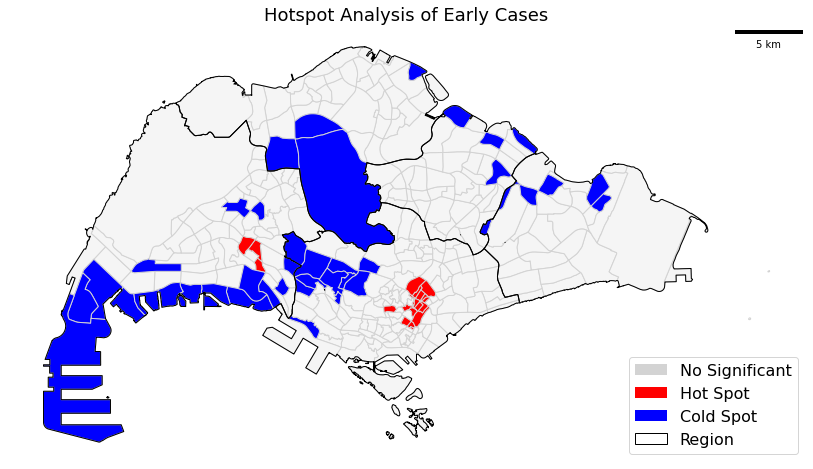

In [48]:
fig, ax = plt.subplots(figsize = (20, 8))

subzone.plot(ax = ax, facecolor = "whitesmoke", ec = "lightgrey", label = 'No Significant')
early_cases_density_hotspot.plot(ax = ax, facecolor = "red", ec = "lightgrey",label = "Hot Spot")
early_cases_density_coldspot.plot(ax = ax, facecolor = 'blue',ec = 'lightgrey',label = "Cold Spot")
region.plot(ax = ax,facecolor = "none",ec = "black",label = "Region")

ax.set_title('Hotspot Analysis of Early Cases',fontsize = 18)

no_significance_patch = mpatches.Patch(facecolor='lightgrey', label='The red data')
hotspot_patch = mpatches.Patch(facecolor='red', label='The white data')
coldspot_patch = mpatches.Patch(facecolor='blue', label='The grey data')
region_patch = mpatches.Patch(facecolor='white',edgecolor = 'black', label='The blue data')

lines = [no_significance_patch,hotspot_patch,coldspot_patch,region_patch]
labels = [t.get_label() for t in ax.collections[0:5]]
ax.legend(lines,labels,edgecolor = None,loc = 'lower right',fontsize = 16)
ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))
ax.axis('off')